In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import os,pickle

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv("data_2017.csv").set_index("Country Name")
df.head()

,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,FX.OWN.TOTL.MA.ZS,FX.OWN.TOTL.OL.ZS,...,SE.PRM.NENR,SE.TER.ENRR,SE.ENR.TERT.FM.ZS,SE.TER.ENRR.FE,SE.TER.ENRR.MA,TM.TAX.MRCH.SM.FN.ZS,TM.TAX.MANF.SM.FN.ZS,TM.TAX.TCOM.SM.FN.ZS,NY.TTF.GNFS.KN,NE.TRD.GNFS.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.3,13.5,81.6,97.7,97.1,99.5,14.89,7.16,22.54,18.02,...,94.69278,45.186440,1.18761,55.833092,39.070808,6.785,5.965,10.03,2.223271e+08,77.036522
Albania,79.6,61.8,92.5,99.9,99.7,100.0,40.02,38.10,42.04,42.51,...,95.53947,58.653511,1.30887,69.444946,47.995461,3.740,3.370,4.73,-1.469819e+10,78.194250
Algeria,99.7,98.7,99.9,99.5,98.6,99.9,42.78,29.27,56.25,48.75,...,97.58830,49.377911,1.33998,59.828751,39.487999,18.880,18.290,20.62,-5.133701e+11,49.820816
American Samoa,88.0,73.5,96.4,99.9,100.0,100.0,58.60,53.85,62.40,61.83,...,94.69278,45.186440,1.18761,55.833092,39.070808,6.785,5.965,10.03,-3.071246e+07,161.437908
Andorra,100.0,100.0,100.0,100.0,100.0,100.0,58.60,53.85,62.40,61.83,...,94.69278,15.436940,1.20709,17.391300,13.789780,6.785,5.965,10.03,2.223271e+08,77.036522


In [43]:
energy_group=['EG.CFT.ACCS.ZS', 'EG.EGY.PRIM.PP.KD', 'EG.FEC.RNEW.ZS']

pop_group=['SP.ADO.TFRT','SP.DYN.CDRT.IN','SL.EMP.1524.SP.FE.ZS','SP.POP.GROW','SP.RUR.TOTL.ZS','SP.RUR.TOTL.ZG']

econ_group=['NY.GDP.FRST.RT.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.PP.KD','NY.GDP.FCST.KD','NY.GDP.MINR.RT.ZS']

agr_group=['NV.AGR.TOTL.ZS', 'NV.AGR.TOTL.KD.ZG', 'NV.AGR.EMPL.KD']

trade_transport_group=['TX.VAL.FUEL.ZS.UN', 'TX.VAL.MRCH.AL.ZS','TX.VAL.MRCH.R6.ZS','TM.VAL.MRCH.AL.ZS','TM.VAL.MRCH.R3.ZS',
                       'TX.VAL.MMTL.ZS.UN','TM.VAL.MMTL.ZS.UN']

In [44]:
# save our target (CO2 emissions metric tons per capita) in a separate dataframe "Co2_mpc" and drop it from the dataframe as well
target = 'EN.ATM.CO2E.PC' 
Co2_mpc = df[target]

In [45]:
#We now group all features into one list
large_group=[]
large_group.extend(pop_group)
large_group.extend(energy_group)
large_group.extend(econ_group)
large_group.extend(agr_group)
large_group.extend(trade_transport_group)

In [46]:
df=df[large_group]

In [47]:
df[energy_group]=ss.fit_transform(df[energy_group])

df[pop_group]=ss.fit_transform(df[pop_group])

for col in econ_group:
    df[col]= qt.fit_transform(df[[col]])
df[econ_group]=ss.fit_transform(df[econ_group])

df[agr_group]=ss.fit_transform(df[agr_group])

df[trade_transport_group]=ss.fit_transform(df[trade_transport_group])


In [48]:
df.head()

,SP.ADO.TFRT,SP.DYN.CDRT.IN,SL.EMP.1524.SP.FE.ZS,SP.POP.GROW,SP.RUR.TOTL.ZS,SP.RUR.TOTL.ZG,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.FEC.RNEW.ZS,NY.GDP.FRST.RT.ZS,...,NV.AGR.TOTL.ZS,NV.AGR.TOTL.KD.ZG,NV.AGR.EMPL.KD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.AL.ZS,TX.VAL.MRCH.R6.ZS,TM.VAL.MRCH.AL.ZS,TM.VAL.MRCH.R3.ZS,TX.VAL.MMTL.ZS.UN,TM.VAL.MMTL.ZS.UN
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.135787,-0.226132,-0.984423,1.303832,1.478913,1.585906,-1.074394,-0.906149,-0.322888,0.305170,...,1.658964,0.435309,-0.575279,-0.324100,-0.154795,-0.399514,-0.433400,-0.584067,-0.501173,0.020757
Albania,-0.734148,0.198952,-0.805492,-0.927652,0.047635,-1.709110,0.283085,-0.771578,0.305368,0.167959,...,0.915980,-0.254814,-0.381453,-0.527921,-0.457382,-0.462957,-0.363325,-0.381457,-0.152441,-0.751475
Algeria,-0.828282,-1.166766,-1.747756,0.617830,-0.483607,-0.197454,0.836540,0.090407,-1.023358,0.245250,...,0.113524,-0.863807,0.253081,3.875669,-0.066901,-0.437329,0.637639,0.197130,-0.556752,-0.355348
American Samoa,-0.265758,-0.955549,-0.109145,-2.345566,-1.117541,-1.258082,0.514379,-0.255114,-1.016136,-2.451600,...,-0.340533,0.037246,-0.359373,-0.404797,-0.290829,0.177656,-0.420803,-0.571674,-0.351283,-0.305252
Andorra,-0.992263,-0.179762,-0.109145,0.478426,-1.158635,1.616133,0.844800,-0.960705,-0.377048,-2.451600,...,-0.938208,0.582589,-0.359373,-0.565606,-0.335198,-0.399514,-0.420803,-0.359945,-0.351283,-0.774679


In [49]:
filepath='linear_regression_model.pkl'
if not os.path.exists(filepath):
    raise FileNotFoundError(f"Model file {filepath} not found!")

with open(filepath, 'rb') as file:
    model = pickle.load(file)

In [50]:
X_test=df
y_pred = model.predict(X_test)
y_pred=[max(y_pred[i],0) for i in range(len(y_pred))]

In [51]:
df_result = pd.DataFrame(Co2_mpc)
df_result.rename({'EN.ATM.CO2E.PC': 'True value'}, axis=1, inplace=True)
df_result['Prediction'] = y_pred
df_result.head()

,True value,Prediction
Country Name,,
Afghanistan,0.281196,0.000000
Albania,1.880557,0.923588
Algeria,3.833681,10.829459
American Samoa,2.547316,2.667459
Andorra,6.302098,2.100769


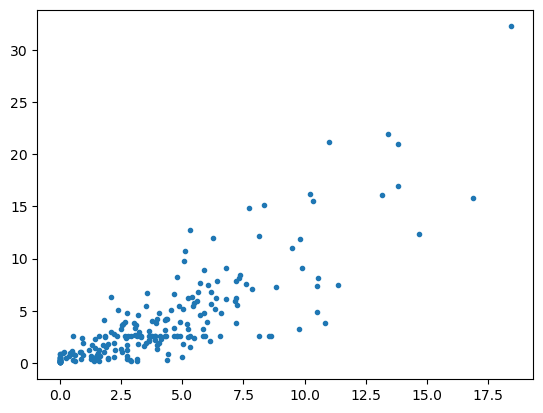

In [52]:
plt.plot(y_pred,Co2_mpc,'.')

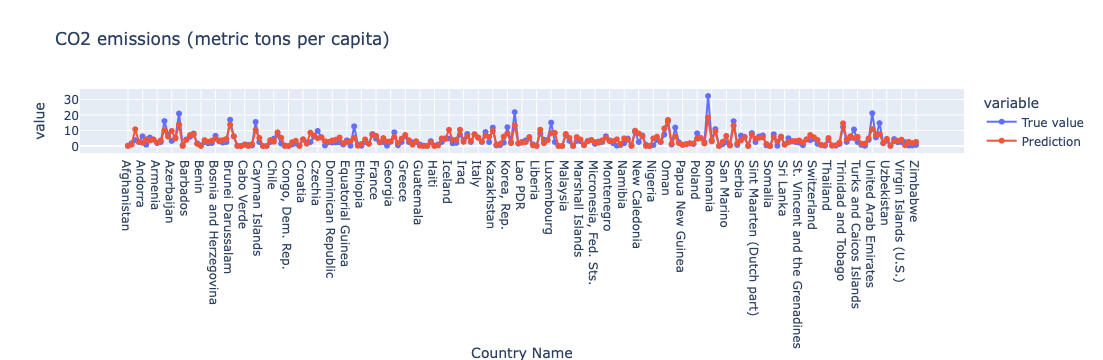

In [53]:
fig = px.line(df_result, markers=any, title='CO2 emissions (metric tons per capita)')
fig.show()

In [54]:
r2_score(Co2_mpc.values, y_pred)

0.6700433401875239